# <center> <b> AIRBNB: MADRID  </b> </center>
<P align="right"> IGNACIO TORRALBA RUIZ

# 1. Introduction

## 1.1 Final exercise of module 2

The starting point is the consideration that there is a big problem with AirBnb rental housing and tourism in cities. We are going to work with a `dataset` to analyze this problem.

It is known that many private owners find it more profitable and lucrative to rent flats to tourists than to locals (especially in city centers), and many real estate agencies buy properties and convert them into tourist accommodation as well. All of this has the effect of reducing supply, increasing prices, and pushing local businesses to other neighborhoods, leaving only tourists in the center.

With this in mind, and knowing that Airbnb is one of the most popular online marketplaces for accommodation today, we will dig into the data for:

- On the one hand, to evaluate the impact that Airbnb has on housing (in this case, the city of Madrid is analyzed).
- On the other hand, inquire about who, when and how is rented and possibly make considerations about tourist flows.

## 1.2 Airbnb-Madrid

Airbnb is a online marketplace and hospitality service that allows people to lease or rent short-term lodging, including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms. The company was founded in 2008 by Brian Chesky, Joe Gebbia and Nathan Blecharczyk. It is headquartered in San Francisco, California. The platform enables hosts to list their properties for rent and guests to book accommodations. The platform is now available in over 220 countries and territories worldwide.

Madrid is the capital and largest city of Spain. It is located in the center of the country and has a population of approximately 3.3 million people. Madrid is known for its rich cultural heritage, with famous museums such as the Prado and the Reina Sofia, as well as many historic landmarks and monuments. The city is also known for its vibrant nightlife and delicious cuisine.


<br>
<center><img src="https://viajes.nationalgeographic.com.es/medio/2019/03/20/puerta-del-sol-madrid_acdeeb0f_1280x720.jpg" width="1000" height="700"></center>
<br>
<center> Imagen <a href="https://viajes.nationalgeographic.com.es/c/madrid">National Geografhic viajes</a><br /></center>


# 2. Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from  matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go

# 3. Loading Dataset

In [2]:
madrid = pd.read_csv('data/airbnb_anuncios.csv')
madrid.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337


## 3.1 Analysis

We will not always have a description of the columns. Analyze them with the following commands: `shape`, `dtypes` and `info`.

### 3.1.1 Shape of the dataset

In [4]:
madrid.shape

(20837, 16)

### 3.1.2 Datatypes of the dataset

In [5]:
madrid.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### 3.1.3 Information of the dataset

In [6]:
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20837 non-null  int64  
 1   name                            20832 non-null  object 
 2   host_id                         20837 non-null  int64  
 3   host_name                       20822 non-null  object 
 4   neighbourhood_group             20837 non-null  object 
 5   neighbourhood                   20837 non-null  object 
 6   latitude                        20837 non-null  float64
 7   longitude                       20837 non-null  float64
 8   room_type                       20837 non-null  object 
 9   price                           20837 non-null  int64  
 10  minimum_nights                  20837 non-null  int64  
 11  number_of_reviews               20837 non-null  int64  
 12  last_review                     

# 4. Data cleaning

## 4.1 Duplicate values

Analyze duplicate values ​​by columns and remove duplicate values

In [3]:
madrid.duplicated().sum()
madrid.drop_duplicates(inplace=True)

## 4.2 Null values

Check for null values

In [9]:
madrid.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Percentage of null values ​​per column

In [10]:
def check_values ():
    for column in madrid.columns:
        if  ( madrid[column].isnull().sum()/len(madrid[column])*100 > 0.1):
                 print( column + ' ' + str( madrid[column].isnull().sum()/len(madrid[column])*100) + '%') 

check_values()

last_review 22.33526899265729%
reviews_per_month 22.33526899265729%


### 4.2.1 Column cleaning

Remove `name`, `id`, `host_name` and `last_review` columns.

In [11]:
madrid.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
madrid.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [13]:
madrid.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### 4.2.2 Neighborhood analysis

Analyze the `neighbourhood_group` column and count the values. Use the `normalize` parameter with values ​​of `True` or `False` to see its usefulness.

In [5]:
madrid.neighbourhood_group.value_counts(normalize=True)

Centro                   0.469021
Salamanca                0.065988
Chamberí                 0.063877
Arganzuela               0.053799
Tetuán                   0.040217
Carabanchel              0.032538
Retiro                   0.031914
Latina                   0.029563
Ciudad Lineal            0.029419
Puente de Vallecas       0.028363
Chamartín                0.026443
Moncloa - Aravaca        0.026011
San Blas - Canillejas    0.025148
Usera                    0.017325
Hortaleza                0.015933
Fuencarral - El Pardo    0.014397
Villaverde               0.007967
Barajas                  0.007919
Moratalaz                0.006095
Villa de Vallecas        0.004943
Vicálvaro                0.003119
Name: neighbourhood_group, dtype: float64

### 4.2.3 Treatment of the `reviews_per_month` column

Set null column values ​​to 0 with the `fillna` command.

In [6]:
madrid.fillna({'reviews_per_month':0}, inplace=True)
madrid.reviews_per_month.isnull().sum()

0

### 4.2.4 Remove the NaN values from the dataset

In [7]:
madrid.isnull().sum()
madrid.dropna(how='any',inplace=True)
madrid.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20837 entries, 0 to 20836
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20837 non-null  int64  
 1   neighbourhood_group             20837 non-null  object 
 2   neighbourhood                   20837 non-null  object 
 3   latitude                        20837 non-null  float64
 4   longitude                       20837 non-null  float64
 5   room_type                       20837 non-null  object 
 6   price                           20837 non-null  int64  
 7   minimum_nights                  20837 non-null  int64  
 8   number_of_reviews               20837 non-null  int64  
 9   reviews_per_month               20837 non-null  float64
 10  calculated_host_listings_count  20837 non-null  int64  
 11  availability_365                20837 non-null  int64  
dtypes: float64(3), int64(6), object(

## 4.3 Use the `describe` command to see the state of the data

In [19]:
madrid.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000
mean,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.521432,12.188559,155.097567
std,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.916618,32.156130,133.746263
min,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.070000,1.000000,17.000000
50%,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,0.750000,2.000000,123.000000
75%,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.360000,7.000000,300.000000
max,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


# 5. Data Visualization

## 5.1 Analyze the correlation of the variables

C:\Users\nacho\AppData\Local\Temp\ipykernel_29596\3472109806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = madrid.corr(method='kendall')


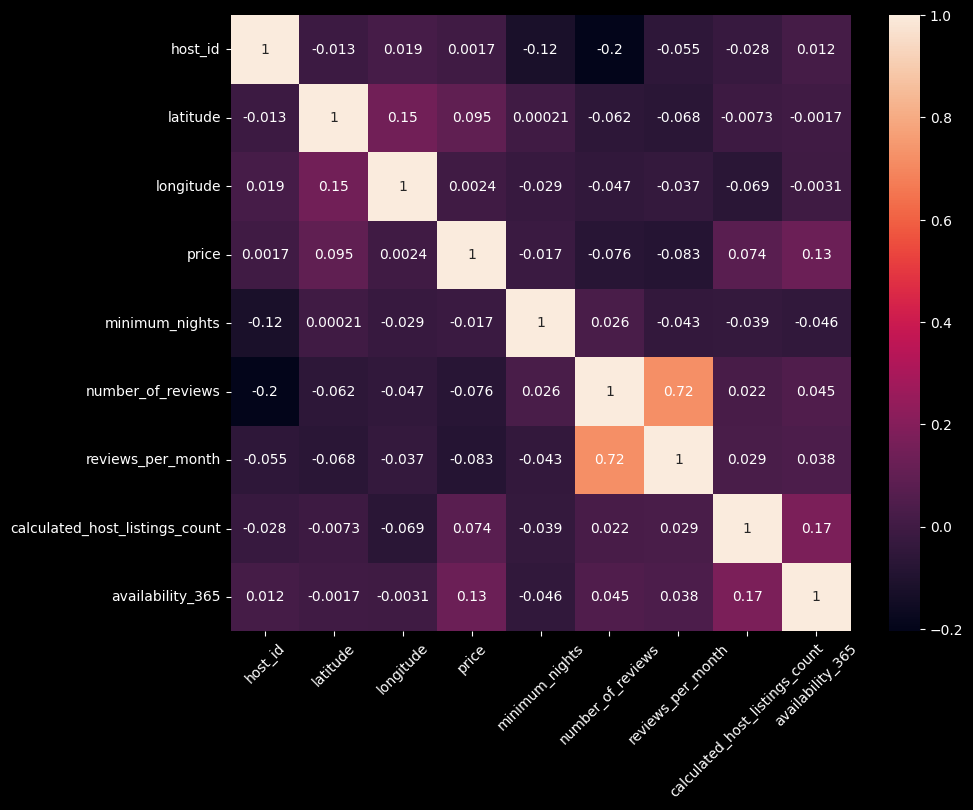

In [13]:
corr = madrid.corr(method='kendall')
plt.style.use('dark_background');
fig= plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.xticks(rotation= 45);


In [23]:
fig.savefig('correlation.png',bbox_inches='tight')

## 5.2 Neighbourhood Group

Identify neighborhoods in the dataset and represent the neighborhoods and their importance

Use `countplot` of `Seaborn` on the `neighbourhood_group` column.


In [34]:
madrid['neighbourhood_group'].unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

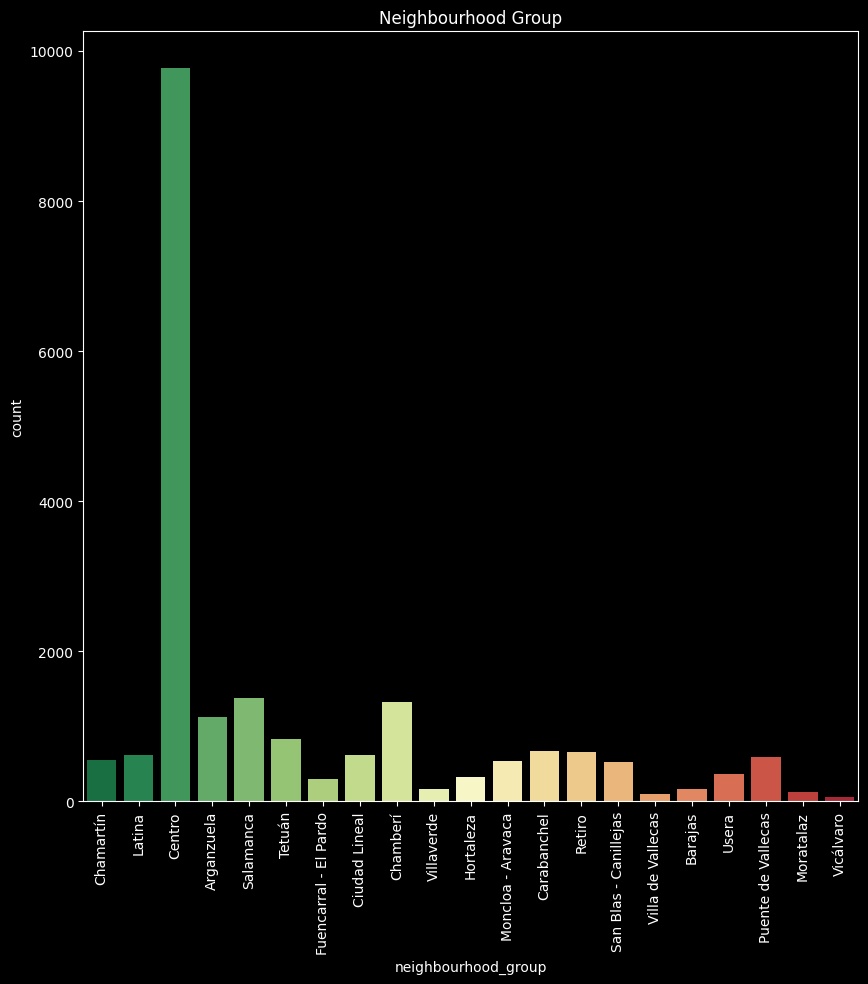

In [25]:
sns.countplot(data=madrid,x='neighbourhood_group', palette="RdYlGn_r")
fig1 = plt.gcf()
fig1.set_size_inches(10,10)
plt.title('Neighbourhood Group')
plt.xticks(rotation= 90);

In [26]:
fig1.savefig('neighbourhood_group.png',bbox_inches='tight')

## 5.3 Neighbourhood

Use `countplot` of `Seaborn` on the `neighbourhood` column.

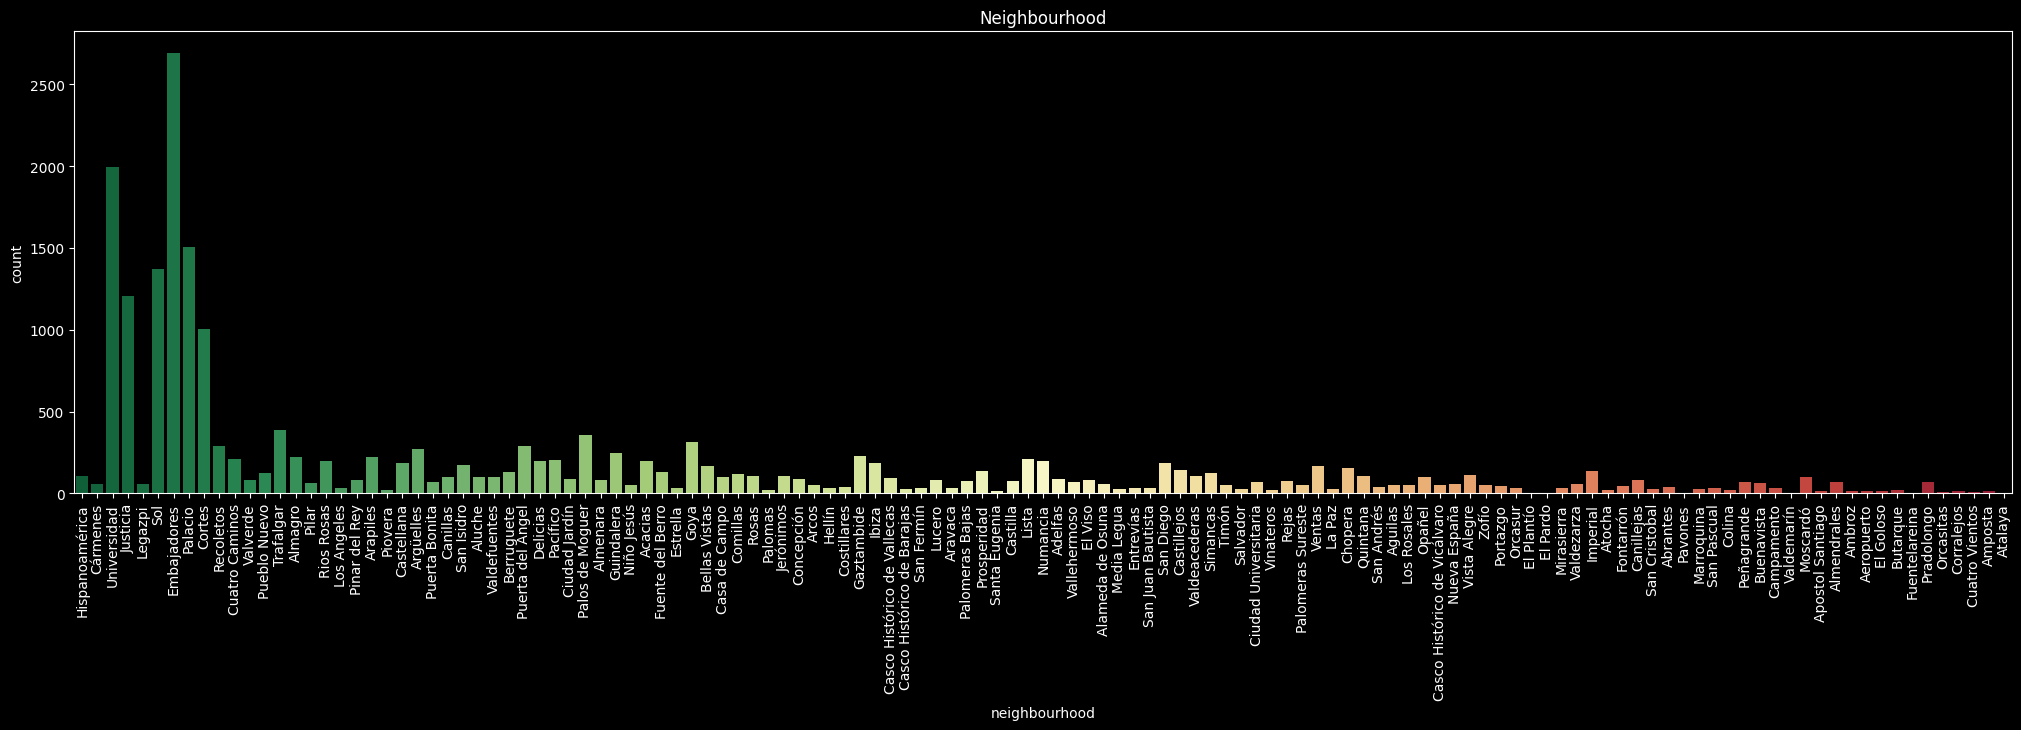

In [29]:
sns.countplot(data=madrid,x='neighbourhood', palette="RdYlGn_r")
fig2 = plt.gcf()
fig2.set_size_inches(25,6)
plt.title('Neighbourhood')
plt.xticks(rotation= 90);

In [31]:
fig2.savefig('neighbourhood.png',bbox_inches='tight')

## 5.4 Room Type

Use `countplot` de `Seaborn` en la columna `neighbourhood`.

Text(0.5, 1.0, 'Types of rooms most offered')

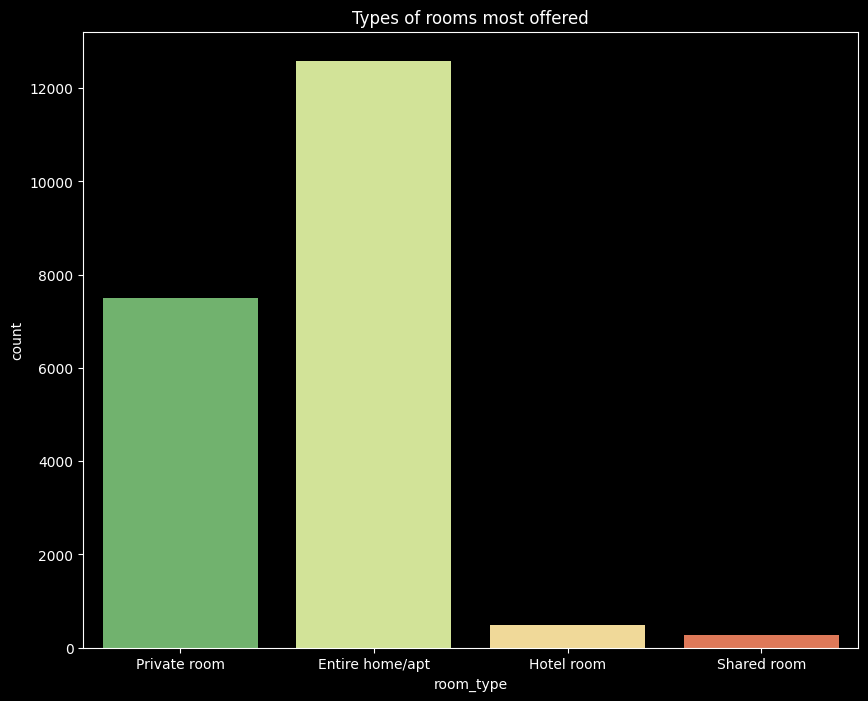

In [32]:
sns.countplot(data=madrid,x='room_type', palette="RdYlGn_r")
fig3 = plt.gcf()
fig3.set_size_inches(10,8)
plt.title('Types of rooms most offered')


In [33]:
fig3.savefig('room_type.png',bbox_inches='tight')

## 5.5 Relation between neighbourgroup and Availability of Room

Relationship between the column `neighbour_group` and `availability_365` that corresponds to the availability

You can use a `sns` `boxplot`.

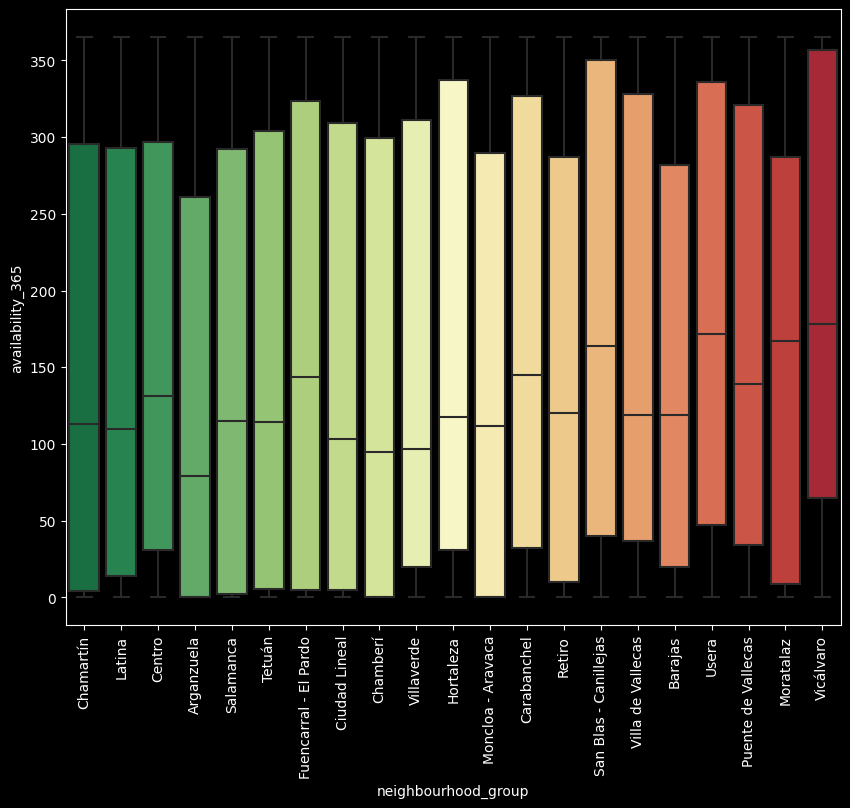

In [35]:
fig4= plt.figure(figsize=(10,8))
sns.boxplot(data=madrid, x='neighbourhood_group',y='availability_365',palette='RdYlGn_r');
plt.xticks(rotation= 90);

In [37]:
fig4.savefig('neigh_avail.png',bbox_inches='tight')

## 5.6 Map of Neighbourhood group

Use a `sns` `scatterplot`.

To do this, you must supply the `longitude`, `latitude` columns and, like `hue`, supply the `neighbourhood_group` column.

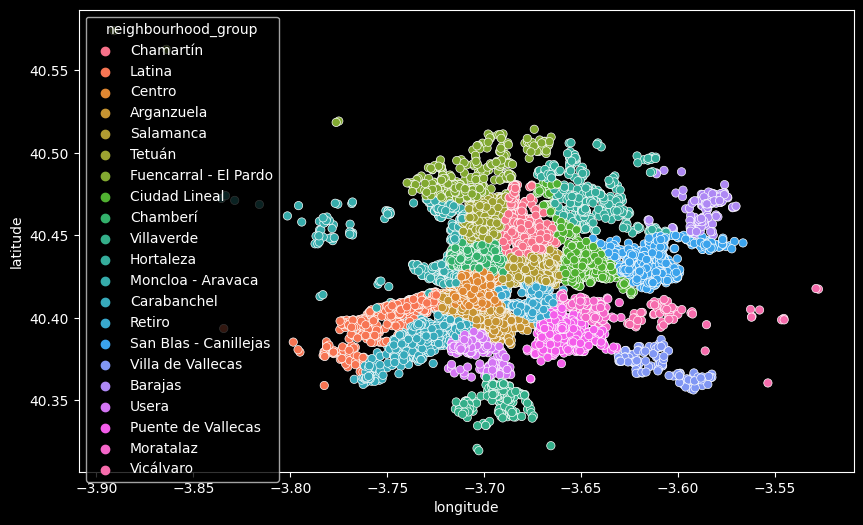

In [39]:
fig5= plt.figure(figsize=(10,6))
sns.scatterplot(x=madrid['longitude'],y=madrid['latitude'],hue=madrid.neighbourhood_group)
plt.show()

In [40]:
fig5.savefig('map_neighgroup.png',bbox_inches='tight')

## 5.7 Map of Neighbourhood

Following the above command, use the `neighbourhood` column.

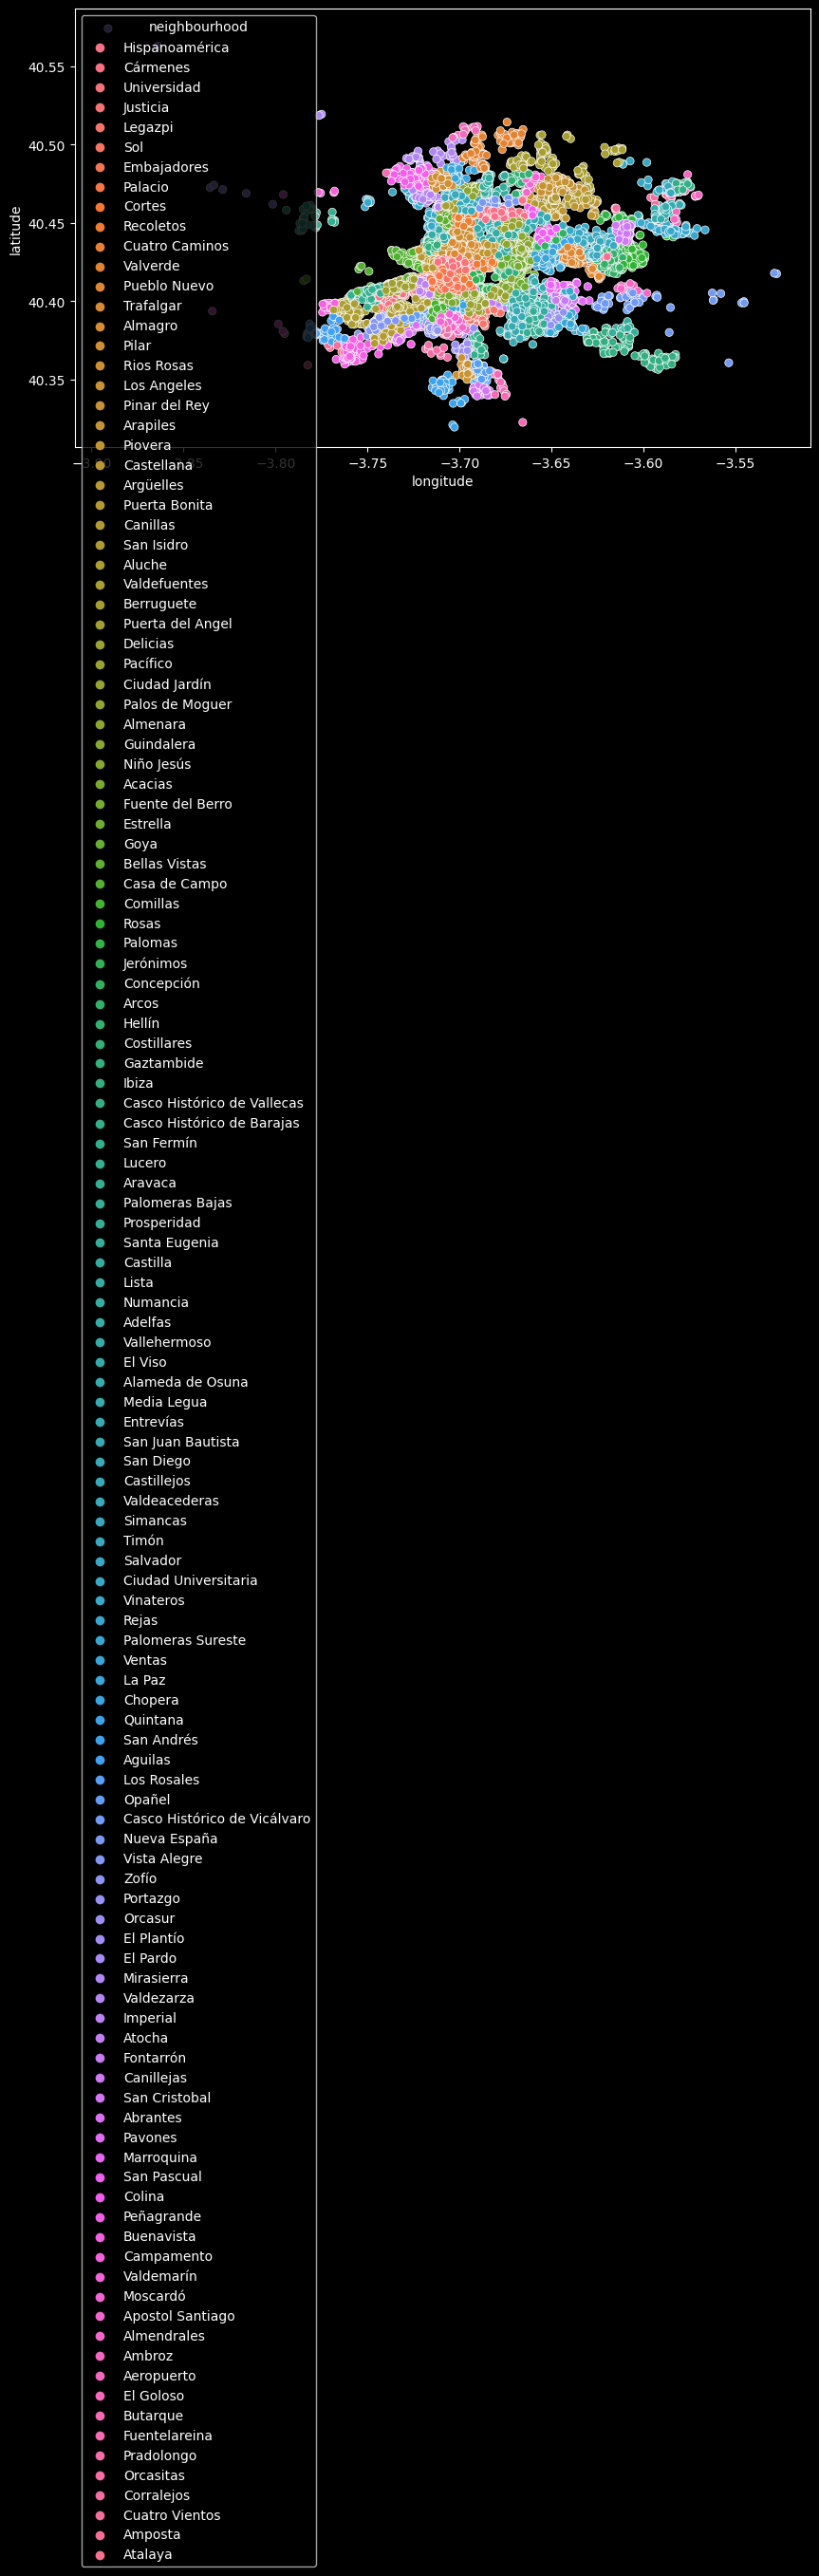

In [42]:
fig6=plt.figure(figsize=(10,6))
sns.scatterplot(x=madrid['longitude'],y=madrid['latitude'],hue=madrid.neighbourhood)
plt.show()

In [43]:
fig6.savefig('map_neighbourhood.png',bbox_inches='tight')

## 5.8 Map of room type

This time, use the `room_type` column.

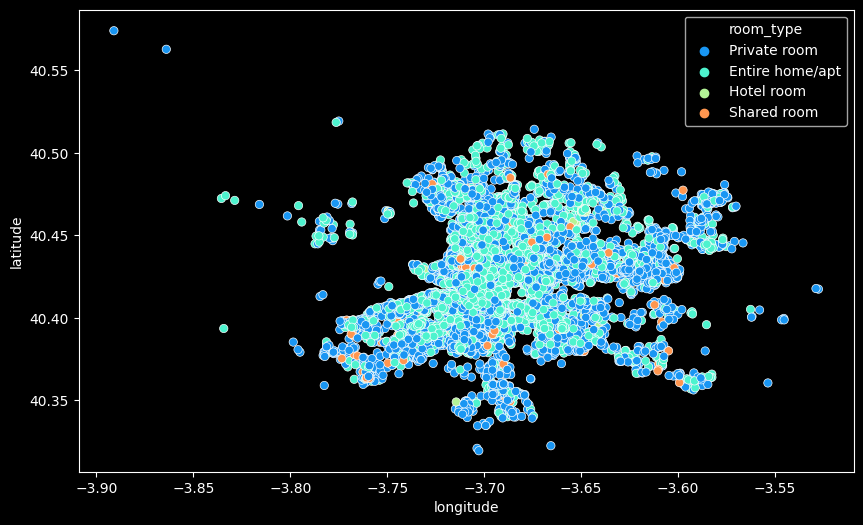

In [54]:
fig7=plt.figure(figsize=(10,6))
sns.scatterplot(x=madrid['longitude'],y=madrid['latitude'],hue=madrid.room_type,palette='rainbow')
plt.show()

In [55]:
fig7.savefig('map_roomtype.png',bbox_inches='tight')

## 5.9 Map of availability of Room

Create a map to see room availability.

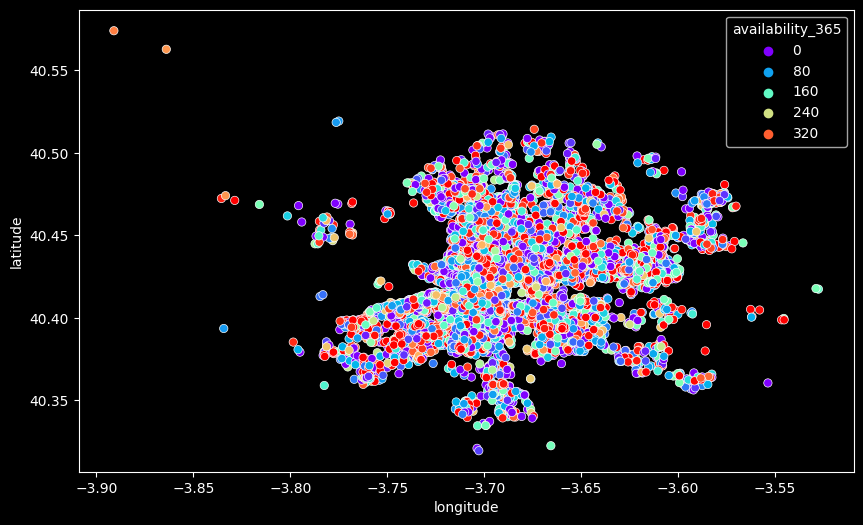

In [51]:
fig8=plt.figure(figsize=(10,6))
sns.scatterplot(x=madrid['longitude'],y=madrid['latitude'],hue=madrid.availability_365,palette='rainbow')
plt.show()

In [52]:
fig8.savefig('map_avail.png',bbox_inches='tight')

# 6. Save data

In [8]:
madrid.to_csv('madrid_clean.csv')

# 7. Word Cloud

In [70]:
from  matplotlib.colors import LinearSegmentedColormap

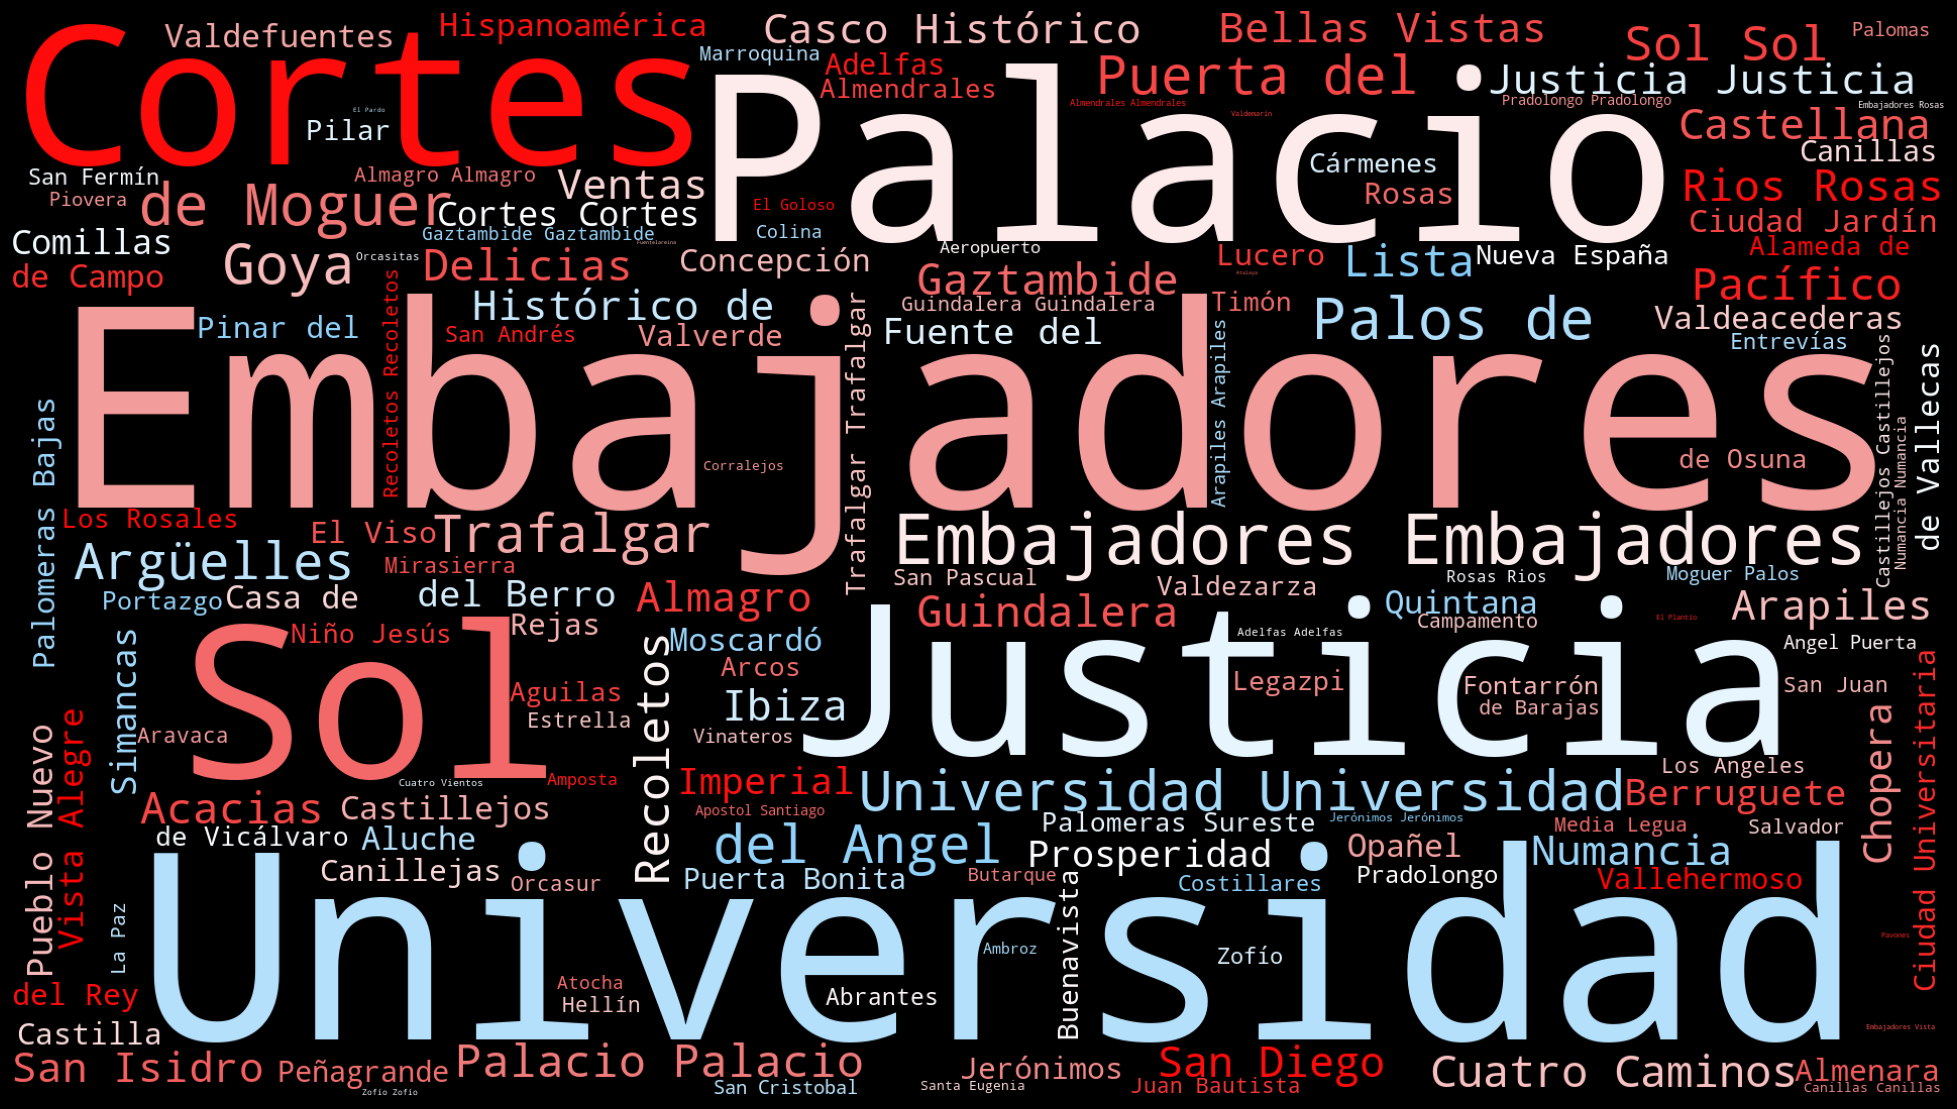

In [60]:
cmap=LinearSegmentedColormap.from_list('rg',["red","lightcoral","white","LightSkyBlue"], N=256)

plt.subplots(figsize=(25,15))
wordcloud = WordCloud( background_color='black',width=1920,height=1080,colormap= cmap).generate(" ".join(madrid.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('neighbourhood.png')
plt.show()